Ejemplo 1

In [1]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [2]:
# Generar un conjunto de datos de ejemplo
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1)
X[:10]

array([[5.48813504],
       [7.15189366],
       [6.02763376],
       [5.44883183],
       [4.23654799],
       [6.45894113],
       [4.37587211],
       [8.91773001],
       [9.63662761],
       [3.83441519]])

In [3]:
y[:10]

array([[10.81112024],
       [16.20461381],
       [13.52092996],
       [10.36141997],
       [10.96134818],
       [15.81377144],
       [10.9305238 ],
       [18.65553518],
       [19.20250259],
       [ 9.7232821 ]])

In [4]:
# Crear un DataFrame de Pandas
# flatten se utiliza para convertir una matriz (o array multidimensional) en un array unidimensional
df = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})
df

,X,y
0,5.488135,10.811120
1,7.151894,16.204614
2,6.027634,13.520930
3,5.448832,10.361420
4,4.236548,10.961348
...,...,...
95,1.831914,5.345422
96,5.865129,11.926849
97,0.201075,0.712601
98,8.289400,17.123268


In [5]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df[['X']], df['y'], test_size=0.2, random_state=42)

In [6]:
# Crear el modelo de regresión lineal
regression_model = LinearRegression()

In [7]:
# Entrenar el modelo con el conjunto de entrenamiento
regression_model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Realizar predicciones en el conjunto de prueba
y_pred = regression_model.predict(X_test)

In [9]:
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)

# Imprimir el MSE y R^2
print("MSE:", mse)
print("R^2:", r2)

MSE: 0.917753246971429
R^2: 0.9576884341540605


In [10]:
# Realizar validación cruzada
cv_scores = cross_val_score(regression_model, df[['X']], df['y'], cv=5)
print("CV Scores:", cv_scores)
print("Promedio de CV Scores:", np.mean(cv_scores))

CV Scores: [0.96859697 0.95249312 0.97017065 0.96897191 0.97007101]
Promedio de CV Scores: 0.9660607330261536


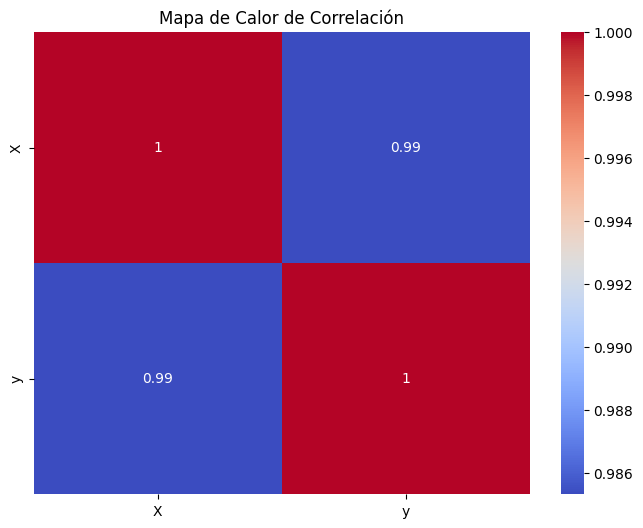

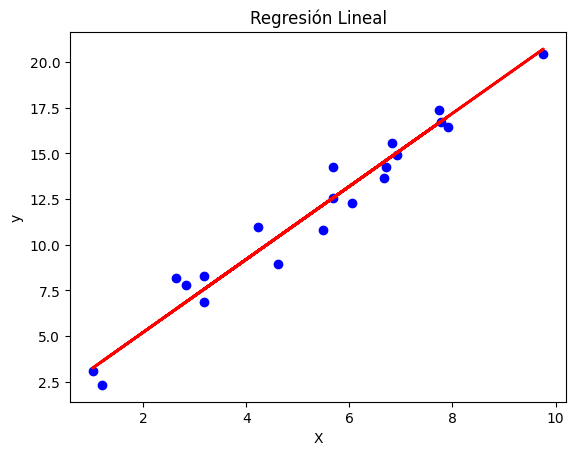

In [11]:
# Crear un mapa de calor de la correlación
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

# Graficar la regresión lineal
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal')
plt.show()

Ejemplo 2: Polinomial

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
# Crear datos de ejemplo: una curva sinusoidal con ruido
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y += 0.5 * np.random.randn(80)

In [14]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Crear un DataFrame para visualización
data = pd.DataFrame({'X': X_train.flatten(), 'y': y_train})
data

,X,y
0,4.718740,-0.661763
1,3.696318,0.136483
2,3.281648,-0.217103
3,2.609242,-0.127682
4,0.551876,0.588777
...,...,...
59,1.051913,1.101205
60,3.575947,-0.271706
61,4.458865,-0.952119
62,0.690915,0.201844


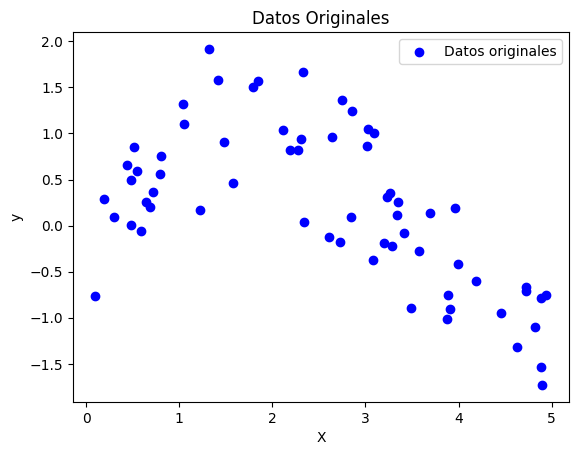

In [16]:
# Visualizar los datos originales
plt.scatter(X_train, y_train, label='Datos originales', color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Datos Originales')
plt.legend()
plt.show()

In [17]:
# Crear un modelo de regresión polinomial de grado 3
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()

In [18]:
# Entrenar el modelo polinomial
poly_model.fit(X_poly, y_train)

LinearRegression()

In [19]:
# Realizar predicciones en el conjunto de prueba
X_test_poly = poly_features.transform(X_test)
y_pred = poly_model.predict(X_test_poly)

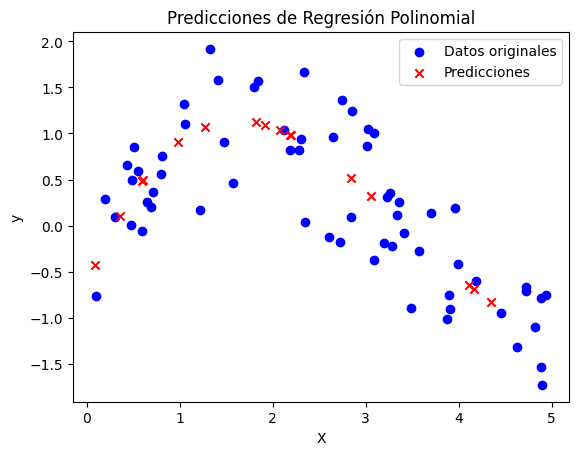

MSE en conjunto de prueba: 0.20845599329194414
MSE con validación cruzada: 0.2452286755799014


In [20]:
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Realizar validación cruzada con 5 pliegues
cv_scores = cross_val_score(poly_model, X_poly, y_train, cv=5, scoring='neg_mean_squared_error')
mse_cv = -cv_scores.mean()  # Negate the scores to get positive MSE values

# Visualizar las predicciones
plt.scatter(X_train, y_train, label='Datos originales', color='blue')
plt.scatter(X_test, y_pred, label='Predicciones', color='red', marker='x')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Predicciones de Regresión Polinomial')
plt.legend()
plt.show()

# Imprimir los resultados
print("MSE en conjunto de prueba:", mse)
print("MSE con validación cruzada:", mse_cv)

Ejemplo 3: Series de Tiempo

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Crear una serie temporal simple de ventas diarias (como ejemplo)
np.random.seed(0)
n_days = 100
sales = np.random.randint(50, 200, size=n_days) + np.arange(n_days)
date_range = pd.date_range(start='2022-01-01', periods=n_days, freq='D')

# Crear un DataFrame
df = pd.DataFrame({'Date': date_range, 'Sales': sales})
df

,Date,Sales
0,2022-01-01,97
1,2022-01-02,168
2,2022-01-03,119
3,2022-01-04,156
4,2022-01-05,63
...,...,...
95,2022-04-06,283
96,2022-04-07,260
97,2022-04-08,190
98,2022-04-09,275


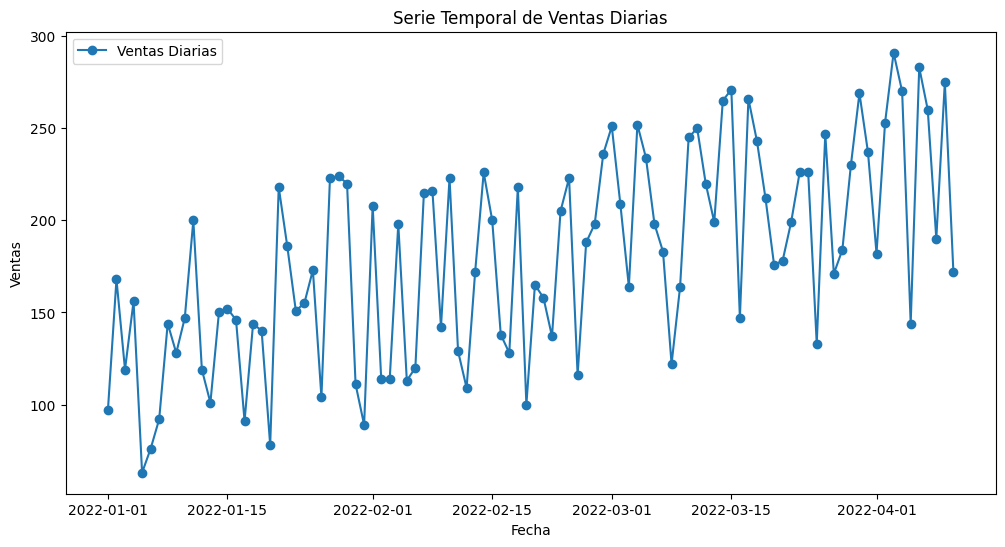

In [23]:
# Visualizar la serie temporal
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Sales'], label='Ventas Diarias', marker='o', linestyle='-')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Serie Temporal de Ventas Diarias')
plt.legend()
plt.show()

In [24]:
# Crear una característica de días desde el inicio
df['Days'] = (df['Date'] - df['Date'].min()).dt.days
df

,Date,Sales,Days
0,2022-01-01,97,0
1,2022-01-02,168,1
2,2022-01-03,119,2
3,2022-01-04,156,3
4,2022-01-05,63,4
...,...,...,...
95,2022-04-06,283,95
96,2022-04-07,260,96
97,2022-04-08,190,97
98,2022-04-09,275,98


In [25]:
# Dividir el conjunto de datos en entrenamiento y prueba
X = df[['Days']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Crear y entrenar un modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Realizar predicciones en el conjunto de prueba
y_pred = regression_model.predict(X_test)

In [28]:
# Calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

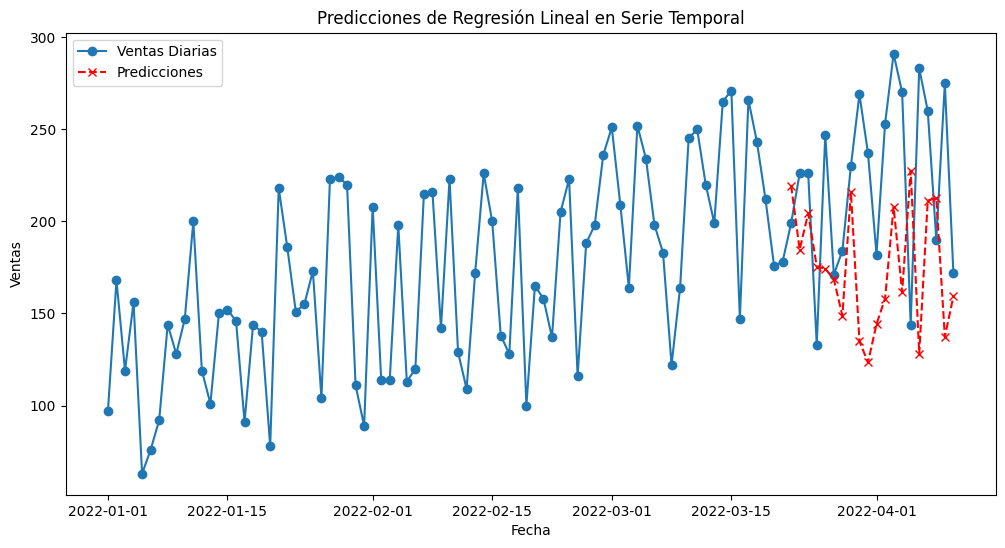

MSE en conjunto de prueba: 1968.0868790436666
R^2 en conjunto de prueba: 0.3755395953105136


In [29]:
# Visualizar las predicciones
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Sales'], label='Ventas Diarias', marker='o', linestyle='-')
plt.plot(df['Date'][len(X_train):], y_pred, label='Predicciones', marker='x', linestyle='--', color='red')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Predicciones de Regresión Lineal en Serie Temporal')
plt.legend()
plt.show()

# Imprimir los resultados
print("MSE en conjunto de prueba:", mse)
print("R^2 en conjunto de prueba:", r2)

Reto 3

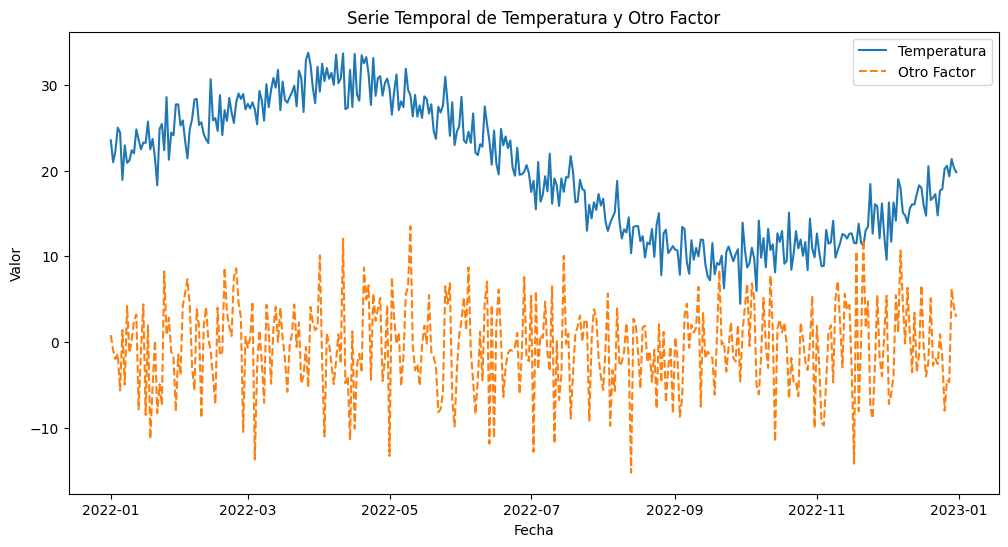

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(0)
n_days = 365  # Número de días en el conjunto de datos
dates = pd.date_range(start='2022-01-01', periods=n_days, freq='D')
temperature = 20 + np.sin(np.arange(n_days) * 2 * np.pi / 365) * 10 + np.random.randn(n_days) * 2
other_factor = np.random.randn(n_days) * 5

# Crear un DataFrame con las características
df = pd.DataFrame({'Date': dates, 'Temperature': temperature, 'OtherFactor': other_factor})

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Temperature'], label='Temperatura', linestyle='-')
plt.plot(df['Date'], df['OtherFactor'], label='Otro Factor', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie Temporal de Temperatura y Otro Factor')
plt.legend()
plt.show()

In [31]:
# Divide los datos en conjuntos de entrenamiento y prueba.

# Preprocesa la fecha para convertirla en una característica numérica. Puedes
# extraer el día del año o cualquier otra representación que prefieras.

# Crea y entrena un modelo de regresión lineal.

# Realiza predicciones en el conjunto de prueba.

# Calcula el error cuadrático medio (MSE) y el coeficiente de determinación (R^2) para evaluar el rendimiento del modelo.

KeyError: ignored

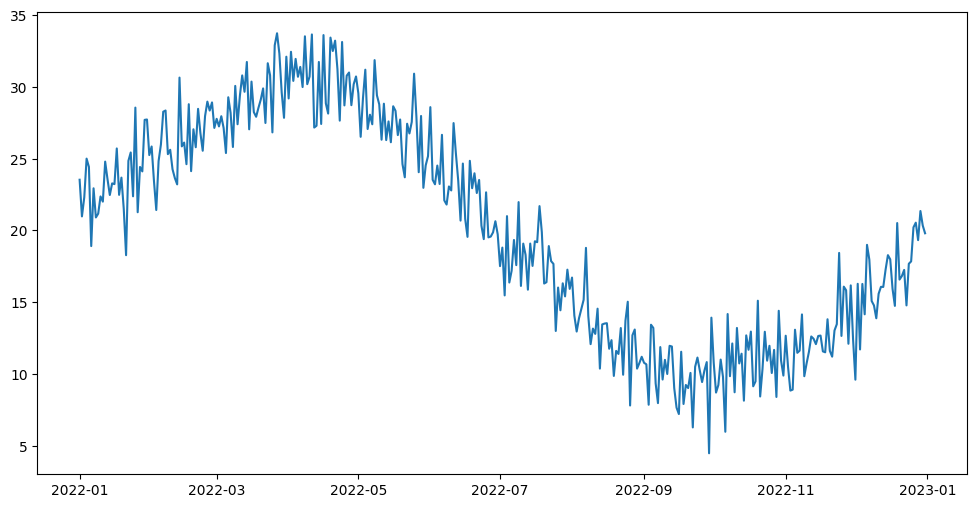

In [32]:
# Ejecuta las siguientes celdas para confirmar tus resultados.

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Temperature'], label='Temperatura Observada', linestyle='-')
plt.plot(X_test['DayOfYear'], y_pred, label='Predicciones', linestyle='--', color='red')
plt.xlabel('Día del Año')
plt.ylabel('Temperatura')
plt.title('Predicciones de Regresión Lineal en Serie Temporal de Temperatura')
plt.legend()
plt.show()

print("MSE en conjunto de prueba:", mse)
print("R^2 en conjunto de prueba:", r2)